In [102]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import pandas as pd
import numpy as np
from numpy import pi
from qiskit import Aer, execute
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [86]:
# Get the data from the .csv file
df = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])
# Change categorical data to number 0-2
df["Class"] = pd.Categorical(df["Class"])
df["Class"] = df["Class"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:2]
category = df.values[:, 2]

c = data.shape[1]

In [87]:
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

In [88]:
def encode_feature(x):
    """"
    We map data feature values to \theta and \phi values using this equation:
        \phi = (x + 1) \frac{\pi}{2},
    where \phi is the phase and \theta the angle
    """
    return ((x + 1) * pi / 2)

In [101]:

centroids = np.array([[-0.25, 0.2], [0, -0.1], [0.25, 0.35]])




k = len(centroids)
#x_point, y_point = point[0], point[1]
x_point, y_point = -0.161,0.141
    
# Calculating theta and phi values
phi_list = [encode_feature(x) for x in [centroids[0][0], centroids[1][0], centroids[2][0]]]
theta_list = [encode_feature(x) for x in [centroids[0][1], centroids[1][1], centroids[2][1]]]
phi_input = encode_feature(x_point)
theta_input = encode_feature(y_point)


# We need 3 quantum registers, of size k one for a data point (input),
# one for each centroid and one for each ancillary
qreg_input = QuantumRegister(k, name='qreg_input')
qreg_centroid = QuantumRegister(k, name='qreg_centroid')
qreg_psi = QuantumRegister(k, name='qreg_psi')


# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(k, 'creg')

# Create the quantum circuit containing our registers
qc = QuantumCircuit(qreg_input, qreg_centroid, qreg_psi, creg, name='qc')

backend = Aer.get_backend('qasm_simulator')

    # Encode the point to measure and centroid
for i in range(k):
    qc.u3(theta_list[i], phi_list[i], 0, qreg_centroid[i])
    qc.u3(theta_input, phi_input, 0, qreg_input[i]) 

for i in range(k):
    # Apply a Hadamard to the ancillaries
    qc.h(qreg_psi[i])

    # Perform controlled swap
    qc.cswap(qreg_psi[i], qreg_input[i], qreg_centroid[i]) 

        # Apply second Hadamard to ancillary
    qc.h(qreg_psi[i])

        # Measure ancillary
    qc.measure(qreg_psi[i], creg[i])
        


In [98]:
print(qc)


                    ┌─────────────────────┐           
   qreg_input_0: |0>┤ U3(1.7923,1.3179,0) ├─X─────────
                    ├─────────────────────┤ │         
   qreg_input_1: |0>┤ U3(1.7923,1.3179,0) ├─┼─────────
                    ├─────────────────────┤ │         
   qreg_input_2: |0>┤ U3(1.7923,1.3179,0) ├─┼─────────
                    └┬────────────────────┤ │         
qreg_centroid_0: |0>─┤ U3(1.885,1.1781,0) ├─X─────────
                    ┌┴────────────────────┤ │         
qreg_centroid_1: |0>┤ U3(1.4137,1.5708,0) ├─┼─────────
                    ├─────────────────────┤ │         
qreg_centroid_2: |0>┤ U3(2.1206,1.9635,0) ├─┼─────────
                    └────────┬───┬────────┘ │ ┌───┐┌─┐
     qreg_psi_0: |0>─────────┤ H ├──────────■─┤ H ├┤M├
                             └───┘            └───┘└╥┘
     qreg_psi_1: |0>────────────────────────────────╫─
                                                    ║ 
     qreg_psi_2: |0>────────────────────────────────╫─
          

In [99]:
qc.draw()

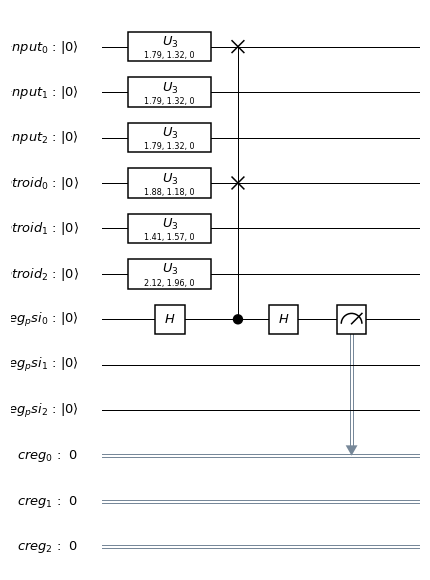

In [100]:
# Matplotlib Drawing
qc.draw(output='mpl')


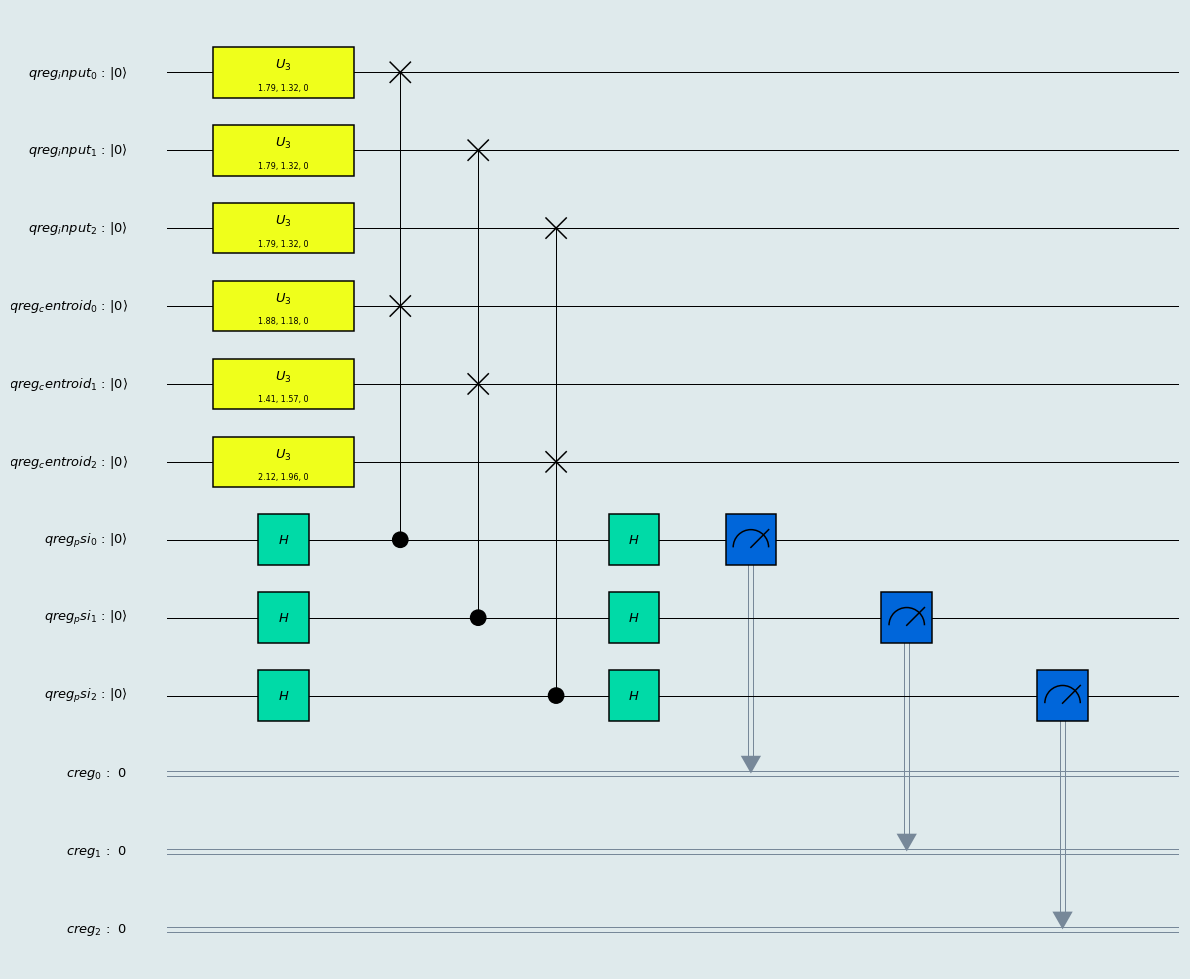

In [108]:
# Change the background color in mpl

style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'displaycolor': {
        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

qc.draw(output='mpl', style=style, reverse_bits= False,filename="d2.png",scale=1.2)


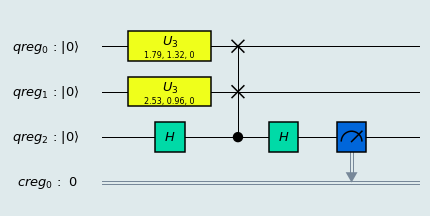

In [84]:
# Change the background color in mpl

style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'displaycolor': {
        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

qc.draw(output='mpl', style=style, reverse_bits= False,filename="d1.png")


### Paper circuit

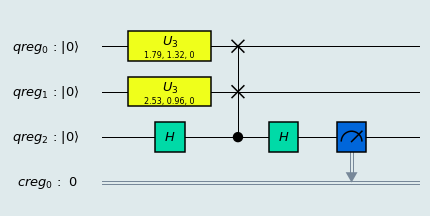

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi

#fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Get the data from the .csv file
data = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])

# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

# This is the point we need to classify
y_p = 0.141
x_p = -0.161

# Finding the x-coords of the centroids
xgc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xbc = sum(blueData['Feature 1']) / len(blueData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])
'''
# Finding the y-coords of the centroids
ygc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ybc = sum(blueData['Feature 2']) / len(blueData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

# Plotting the centroids
plt.plot(xgc, ygc, 'gx')
plt.plot(xbc, ybc, 'bx')
plt.plot(xkc, ykc, 'kx')

# Plotting the new data point
plt.plot(x_p, y_p, 'ro')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])

plt.show()
'''
# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc]]

# Create a 2 qubit QuantumRegister - two for the vectors, and 
# one for the ancillary qubit
qreg = QuantumRegister(3, 'qreg')

# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(1, 'creg')

qc = QuantumCircuit(qreg, creg, name='qc')

# Get backend using the Aer provider
backend = Aer.get_backend('qasm_simulator')

# Create list to hold the results
results_list = []

# Estimating distances from the new point to the centroids
for i in range(1, 2): #1:3
    # Apply a Hadamard to the ancillary
    qc.h(qreg[2])

    # Encode new point and centroid
    qc.u3(theta_list[0], phi_list[0], 0, qreg[0])           
    qc.u3(theta_list[i], phi_list[i], 0, qreg[1]) 

    # Perform controlled swap
    qc.cswap(qreg[2], qreg[0], qreg[1])
    # Apply second Hadamard to ancillary
    qc.h(qreg[2])

    # Measure ancillary
    qc.measure(qreg[2], creg[0])

    # Reset qubits
    #qc.reset(qreg)

    # Register and execute job
    job = execute(qc, backend=backend, shots=1024)
    result = job.result().get_counts(qc)
    results_list.append(result['1'])

#print(results_list)

style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'displaycolor': {
        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

qc.draw(output='mpl', style=style, reverse_bits= False)

#
#style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'fold':30,'displaycolor': {
#        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

#qc.draw(output='mpl', style=style, reverse_bits= False,justify="None")

In [ ]:
style = {'backgroundcolor': '#DFEAEC', 'showindex': False, 'displaycolor': {
        'id': 'red', 'meas':'#0066DA', 'h': '#00DAA7', 'u3': '#EFFF1B'} }

qc.draw(output='mpl', style=style, reverse_bits= False)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from numpy import pi

fig, ax = plt.subplots()
ax.set(xlabel='Data Feature 1', ylabel='Data Feature 2')

# Get the data from the .csv file
data = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])

# Create binary variables to filter data
isGreen = data['Class'] == 'Green'
isBlue = data['Class'] == 'Blue'
isBlack = data['Class'] == 'Black'

# Filter data
greenData = data[isGreen].drop(['Class'], axis=1)
blueData = data[isBlue].drop(['Class'], axis=1)
blackData = data[isBlack].drop(['Class'], axis=1)

# This is the point we need to classify
y_p = 0.141
x_p = -0.161

# Finding the x-coords of the centroids
xgc = sum(greenData['Feature 1']) / len(greenData['Feature 1'])
xbc = sum(blueData['Feature 1']) / len(blueData['Feature 1'])
xkc = sum(blackData['Feature 1']) / len(blackData['Feature 1'])

# Finding the y-coords of the centroids
ygc = sum(greenData['Feature 2']) / len(greenData['Feature 2'])
ybc = sum(blueData['Feature 2']) / len(blueData['Feature 2'])
ykc = sum(blackData['Feature 2']) / len(blackData['Feature 2'])

# Plotting the centroids
plt.plot(xgc, ygc, 'gx')
plt.plot(xbc, ybc, 'bx')
plt.plot(xkc, ykc, 'kx')

# Plotting the new data point
plt.plot(x_p, y_p, 'ro')

# Setting the axis ranges
plt.axis([-1, 1, -1, 1])

plt.show()

# Calculating theta and phi values
phi_list = [((x + 1) * pi / 2) for x in [x_p, xgc, xbc, xkc]]
theta_list = [((x + 1) * pi / 2) for x in [y_p, ygc, ybc, ykc]]

# Create a 2 qubit QuantumRegister - two for the vectors, and 
# one for the ancillary qubit
qreg = QuantumRegister(3, 'qreg')

# Create a one bit ClassicalRegister to hold the result
# of the measurements
creg = ClassicalRegister(1, 'creg')

qc = QuantumCircuit(qreg, creg, name='qc')

# Get backend using the Aer provider
backend = Aer.get_backend('qasm_simulator')

# Create list to hold the results
results_list = []

# Estimating distances from the new point to the centroids
for i in range(1, 4):
    # Apply a Hadamard to the ancillary
    qc.h(qreg[2])

    # Encode new point and centroid
    qc.u3(theta_list[0], phi_list[0], 0, qreg[0])           
    qc.u3(theta_list[i], phi_list[i], 0, qreg[1]) 

    # Perform controlled swap
    qc.cswap(qreg[2], qreg[0], qreg[1])
    # Apply second Hadamard to ancillary
    qc.h(qreg[2])

    # Measure ancillary
    qc.measure(qreg[2], creg[0])

    # Reset qubits
    qc.reset(qreg)

    # Register and execute job
    job = execute(qc, backend=backend, shots=1024)
    result = job.result().get_counts(qc)
    results_list.append(result['1'])

print(results_list)

# Create a list to hold the possible classes
class_list = ['Green', 'Blue', 'Black']

# Find out which class the new data point belongs to 
# according to our distance estimation algorithm
quantum_p_class = class_list[results_list.index(min(results_list))]

# Find out which class the new data point belongs to 
# according to classical euclidean distance calculation
distances_list = [((x_p - i[0])**2 + (y_p - i[1])**2)**0.5 for i in [(xgc, ygc), (xbc, ybc), (xkc, ykc)]]
classical_p_class = class_list[distances_list.index(min(distances_list))]